# Made with ML

- https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/madewithml.ipynb
- https://madewithml.com/

In [1]:
# import os
# import sys
# import time
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# from scipy import stats
# import warnings; warnings.filterwarnings('ignore')
# #plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
# %matplotlib inline

# 2. Data
## 2.1 Preparation

### Intuition

먼저 소스에서 데이터를 수집하고 학습, 유효성 검사 및 테스트 데이터 분할로 분할하여 데이터를 준비하는 것부터 시작하겠습니다.

#### Ingestion

In [2]:
import pandas as pd

In [3]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)

In [4]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


#### Splitting

다음으로, 훈련 데이터 세트를 훈련 데이터 분할과 값 데이터 분할로 분할해야 합니다.

1. 훈련 분할을 사용하여 모델을 훈련합니다.
    - 여기서 모델은 내부 가중치를 최적화하기 위해 입력(기능)과 출력(레이블) 모두에 액세스할 수 있습니다.

2. 훈련 분할을 통한 각 반복(에포크) 후에는 값 분할을 사용하여 모델의 성능을 결정합니다.
    - 여기서 모델은 가중치를 최적화하는 데 레이블을 사용하지 않고 대신 검증 성능을 사용하여 학습 속도 등과 같은 학습 하이퍼파라미터를 최적화합니다.

3. 마지막으로, 별도의 홀드아웃 테스트 데이터 세트를 사용하여 훈련 후 모델의 성능을 확인합니다.
    - 이는 훈련 데이터 세트와 유사한 분포의 새로운 데이터에서 모델이 어떻게 작동할 수 있는지에 대한 가장 좋은 척도입니다.

이 애플리케이션의 경우, 훈련 데이터 세트를 훈련 및 val 분할로 분할하고 테스트 세트를 위한 별도의 테스트 데이터 세트를 갖게 됩니다.  
하나의 큰 데이터 세트를 가지고 이를 세 개의 분할로 분할할 수도 있지만, 별도의 테스트 데이터 세트를 갖는 것이 좋습니다.  
시간이 지남에 따라 학습 데이터가 증가하여 테스트 분할이 매번 다르게 보일 수 있습니다. 이렇게 되면 모델을 다른 모델과 비교하거나 서로 비교하기가 어려워집니다.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [7]:
df.dtypes

id              int64
created_on     object
title          object
description    object
tag            object
dtype: object

In [8]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

다중 클래스 작업(각 프로젝트에 정확히 하나의 태그가 있는 경우)의 경우, 데이터 분할이 유사한 클래스 분포를 갖도록 하고 싶습니다. 이를 위해서는 sklearn의 train_test_split() 함수와 함께 stratify 키워드 인수를 사용하여 분할을 계층화하는 방법을 지정하면 됩니다.

In [9]:
# Split dataset
test_size = 0.2
train_df, val_df = train_test_split(
    df, 
    stratify=df.tag, 
    test_size=test_size, 
    random_state=1234
    )

In [10]:
train_df.tag.value_counts()

tag
natural-language-processing    248
computer-vision                228
other                           85
mlops                           50
Name: count, dtype: int64

유효성 검사 분할의 클래스 수를 보기 전에, 유효성 검사 분할은 전체 데이터 세트의 test_size에 불과하다는 점을 기억하세요.  
따라서 훈련 분할의 클래스 수와 비교할 수 있도록 값 수를 조정해야 합니다.

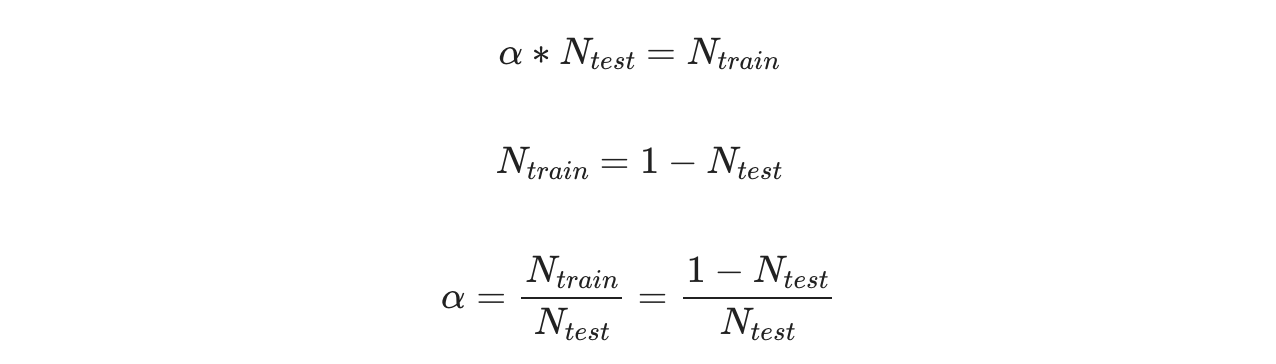

In [11]:
# Validation (adjusted) value counts
val_df.tag.value_counts() * int((1-test_size) / test_size)

tag
natural-language-processing    248
computer-vision                228
other                           84
mlops                           52
Name: count, dtype: int64

- 학습데이터와 유사한 것을 알수있다.

## Exploration: EDA

### Intuition

데이터 세트의 신호와 뉘앙스를 이해하기 위한 탐색적 데이터 분석(EDA).  
이는 문제가 얼마나 잘 정의되었는지에 따라 개발 프로세스의 다양한 시점(라벨링 전/후, 전처리 등)에서 수행할 수 있는 순환적인 프로세스입니다.  
예를 들어, 데이터에 라벨을 붙이거나 전처리하는 방법을 잘 모르겠다면 EDA를 사용하여 문제를 해결할 수 있습니다.

우리는 종종 잘못 이해되는 중요하고도 재미있는 프로세스인 EDA로 프로젝트를 시작하려고 합니다.  
EDA에 대해 생각하는 방법은 다음과 같습니다:

- 단순히 정해진 플롯 세트(상관관계 매트릭스 등)를 시각화하는 것이 아닙니다.
- 목표는 가지고 있는 데이터가 작업에 충분하다는 것을 스스로 확신하는 것입니다.
- 중요한 질문에 답하고 인사이트를 더 쉽게 추출하기 위해 EDA를 사용합니다.
- 일회성 프로세스가 아니라 데이터가 증가함에 따라 분포 변화, 이상 징후 등을 포착하기 위해 EDA를 다시 방문해야 합니다.   

EDA를 사용하여 몇 가지 주요 질문에 답해 보겠습니다.

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn  as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [15]:
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


### target distribution

태그수 찾기

In [16]:
all_tags = Counter(df.tag)
all_tags

Counter({'natural-language-processing': 310,
         'computer-vision': 285,
         'other': 106,
         'mlops': 63})

In [17]:
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

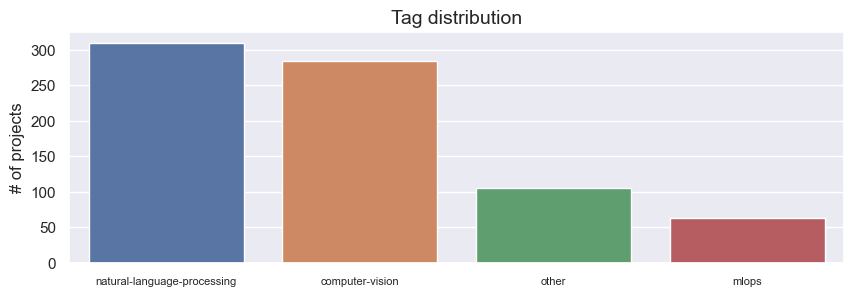

In [18]:
# Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

약간의 데이터 불균형이 있지만 그리 나쁘지는 않습니다.  
이 문제를 해결하기 위해 사용 빈도가 낮은 클래스는 오버 샘플링하고 인기 있는 클래스는 언더 샘플링하거나 손실 함수에 클래스 가중치를 적용하는 등 다양한 전략이 있습니다.

### Wordcloud

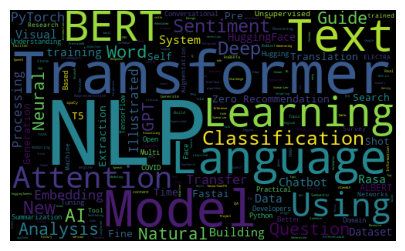

In [19]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset = df[df.tag==tag]
text = subset.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

제목 텍스트 기능에 각 클래스에 대한 좋은 신호가 있고 우리의 직관과 일치하는 것 같습니다.  
설명 텍스트 기능에 대해서도 이 과정을 반복하면 비슷한 품질의 신호를 확인할 수 있습니다.  
이 정보는 모델링에 기능을 어떻게 사용할지 결정할 때 유용할 것입니다.

더 많은 탐색적 데이터 분석을 할 수 있지만 지금은 클래스 분포와 텍스트 기능의 품질에 대한 질문에 대한 답을 얻었습니다.  
다음 단원에서는 모델 학습을 준비하기 위해 데이터 집합을 전처리하겠습니다.

## Preprocessing

### Intuition

데이터 전처리는 preparation과 transformation이라는 두 가지 유형의 프로세스로 분류할 수 있습니다.  
일반적인 전처리 기법을 살펴본 다음 데이터 집합을 전처리해 보겠습니다.

어떤 전처리 단계는 글로벌(데이터 세트에 의존하지 않음, 예: 소문자 텍스트, 마침표 제거 등)이고 어떤 전처리 단계는 로컬(어휘, 표준화 등 학습 분할에서만 학습됨, 예: 구조체만 학습됨)입니다.  
데이터 세트에 따라 달라지는 로컬 전처리 단계의 경우, 데이터 유출을 방지하기 위해 전처리 전에 먼저 데이터를 분할해야 합니다.

### Preparing

#### joins

기존 데이터 테이블에 SQL 조인을 수행하여 필요한 모든 관련 데이터를 하나의 뷰로 정리할 수 있습니다.  
이렇게 하면 데이터 집합으로 훨씬 쉽게 작업할 수 있습니다.

```
SELECT * FROM A
INNTER JOIN B on A.id == B.id
```

데이터 유출을 방지하기 위해 특정 시점의 유효한 조인을 수행하도록 주의해야 합니다.  
예를 들어, 추론이 필요한 시점에 사용할 수 없었던 테이블 A의 개체에 대한 기능이 테이블 B에 있을 수 있습니다.

#### Missing values

먼저, 누락된 값이 있는 행을 식별해야 하며, 식별한 후에는 이를 처리하는 몇 가지 접근 방식이 있습니다.

- 누락된 값이 있는 샘플 생략(작은 하위 집합만 누락된 경우)   

```python
# Drop a row (sample) by index
df.drop([4, 10, ...])
# Conditionally drop rows (samples)
df = df[df.value > 0]
# Drop samples with any missing feature
df = df[df.isnull().any(axis=1)]
```

- omit the entire feature (if too many samples are missing the value)   
```python
# Drop a column (feature)
df.drop(["A"], axis=1)
```

- fill in missing values for features (using domain knowledge, heuristics, etc.)   

```python
# Fill in missing values with mean
df.A = df.A.fillna(df.A.mean())
```

- may not always seem "missing" (ex. 0, null, NA, etc.)

```python
# Replace zeros to NaNs
import numpy as np
df.A = df.A.replace({"0": np.nan, 0: np.nan})
```

#### Outliers (anomalies)

- craft assumptions about what is a "normal" expected value

```python
# Ex. Feature value must be within 2 standard deviations
df[np.abs(df.A - df.A.mean()) <= (2 * df.A.std())]
```

- 중요한 이상값(예: 사기)이 제거되지 않도록 주의해야 합니다.
- 변환을 적용할 때 값이 이상값이 아닐 수 있습니다(예: 거듭제곱법).
- 이상값은 전역(포인트), 컨텍스트(조건부) 또는 집합(개별 포인트는 이상값이 아니며 집합 그룹이 이상값임) 일 수 있습니다.

#### Feature engineering

피처 엔지니어링은 고유한 방식으로 피처를 결합하여 신호를 추출하는 작업입니다.

```python
# Input
df.C = df.A + df.B
```

피처 엔지니어링은 어떤 피처를 엔지니어링하고 사용할지 안내해 줄 도메인 전문가와 협력하여 수행할 수 있습니다.

#### Cleaning

데이터 정리에는 모델이 데이터에서 신호를 더 쉽게 추출할 수 있도록 제약 조건을 적용하는 작업이 포함됩니다.

- 도메인 전문 지식과 EDA 사용
- 필터를 통한 제약 조건 적용
- 데이터 유형 일관성 보장
- 특정 열 값이 있거나 null인 데이터 포인트 제거
- 이미지(자르기, 크기 조정, 자르기 등)

```python
# Resize
import cv2
dims = (height, width)
resized_img = cv2.resize(src=img, dsize=dims, interpolation=cv2.INTER_LINEAR)
```

- 텍스트(소문자, 어간, 문자화, 정규식 등)

```python
# Lower case the text
text = text.lower()
```

### Transformations
Transforming the data involves feature encoding and engineering.

#### Scaling

- 입력의 규모가 프로세스에 영향을 미치는 모델에 필요합니다.
- 학습 분할에서 구조를 학습하고 다른 분할(로컬)에 적용합니다.
- 피처(예: 범주형 피처)에 맹목적으로 스케일링하지 않기

- 표준화: 값을 평균 0, 표준 1로 재조정합니다.

In [21]:
# Standardization
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:\n", x)
print (f"mean: {np.mean(x):.2f}, std: {np.std(x):.2f}")
x_standardized = (x - np.mean(x)) / np.std(x)
print ("x_standardized:\n", x_standardized)
print (f"mean: {np.mean(x_standardized):.2f}, std: {np.std(x_standardized):.2f}")

x:
 [0.0096734  0.16653878 0.36169319 0.96826995]
mean: 0.38, std: 0.36
x_standardized:
 [-1.008769   -0.57744252 -0.04083422  1.62704573]
mean: 0.00, std: 1.00


- min-max: rescale values between a min and max

In [22]:
# Min-max
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
print (f"min: {x.min():.2f}, max: {x.max():.2f}")
x_scaled = (x - x.min()) / (x.max() - x.min())
print ("x_scaled:", x_scaled)
print (f"min: {x_scaled.min():.2f}, max: {x_scaled.max():.2f}")

x: [0.82408217 0.31119528 0.96712655 0.94552567]
min: 0.31, max: 0.97
x_scaled: [0.7819217  0.         1.         0.96706838]
min: 0.00, max: 1.00


- binning: convert a continuous feature into categorical using bins

In [23]:
# Binning
import numpy as np
x = np.random.random(4) # values between 0 and 1
print ("x:", x)
bins = np.linspace(0, 1, 5) # bins between 0 and 1
print ("bins:", bins)
binned = np.digitize(x, bins)
print ("binned:", binned)

x: [0.67788667 0.42144827 0.14984171 0.78270392]
bins: [0.   0.25 0.5  0.75 1.  ]
binned: [3 2 1 4]


#### Encoding

- 데이터를 효율적이고(신호 유지) 효과적으로(패턴 학습, 예: 원핫 대 임베딩) 표현할 수 있습니다.
- 레이블 인코딩 : 범주형 값에 대한 고유 인덱스
- 원핫 인코딩 : 바이너리 벡터로 표현
- 임베딩 : 맥락을 표현하기 위한 representation

```python
# Embeddings
self.embeddings = nn.Embedding(
    embedding_dim=embedding_dim, num_embeddings=vocab_size)
x_in = self.embeddings(x_in)
print (x_in.shape)
```
```python
# 결과
(len(X), embedding_dim)
```

#### Extraction